<a href="https://colab.research.google.com/github/twotablepush/OpenCV/blob/main/10_KNN_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Nearest Neighbor Algorithm

KNN은 비지도학습의 가장 간단한 예시(머신러닝)

다양한 레이블의 데이터 중에서, 자신과 가까운 데이터를 찾아 자신의 레이블을 결정하는 방식


result : [[1.]]
neighbours : [[0. 1. 1.]]
distance : [[ 36.  73. 697.]]


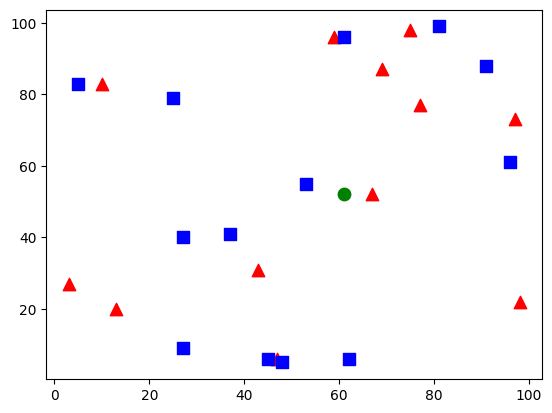

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 각 데이터의 위치 : 25 X 2 크기에 각각 0 ~ 100
trainData = np.random.randint(0, 100, (25, 2)).astype(np.float32)
# 각 데이터는 0 or 1
response = np.random.randint(0, 2, (25, 1)).astype(np.float32)

# 값이 0인 데이터를 각각 (x, y)위치에 빨간색으로 칠한다.
red = trainData[response.ravel() == 0]
plt.scatter(red[:, 0], red[:, 1], 80, 'r', '^')
# 값이 1인 데이터를 각각 (x, y)위치에 파란색으로 칠한다.
blue = trainData[response.ravel() == 1]
plt.scatter(blue[:, 0], blue[:, 1], 80, 'b', 's')

# (0~100, 0~100)위치에 데이터를 하나 생성해 칠한다.
newcomer = np.random.randint(0, 100, (1, 2)).astype(np.float32)
plt.scatter(newcomer[:, 0], newcomer[:, 1], 80, 'g', 'o')

knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, response)
ret, results, neighbours, dist = knn.findNearest(newcomer, 3)

# 가운데 3개를 찾고, 거리를 고려하여 자신을 정한다.
print("result :", results)
print("neighbours :", neighbours)
print("distance :", dist)

plt.show()

## KNN 숫자 인식 예

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving digits.png to digits.png


In [ ]:
import cv2
import numpy as np

image = cv2.imread('digits.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 세로 50줄, 가로 100줄로 사진을 나눈다.
cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
x = np.array(cells)
print(x.shape)

# 각 (20X20)크기의 사진을 한 줄 (1X400)으로 바꾼다.
train = x[:, :].reshape(-1, 400).astype(np.float32)
print(train.shape)

# 0이 500개, 1이 500개, ...로 총 5000개가 들어가는 (1X5000)배열을 만든다.
k = np.arange(10)
train_labels = np.repeat(k, 500)[:, np.newaxis]
print(train_labels.shape)

np.savez("trained.npz", train = train, train_labels = train_labels)

(50, 100, 20, 20)
(5000, 400)
(5000, 1)


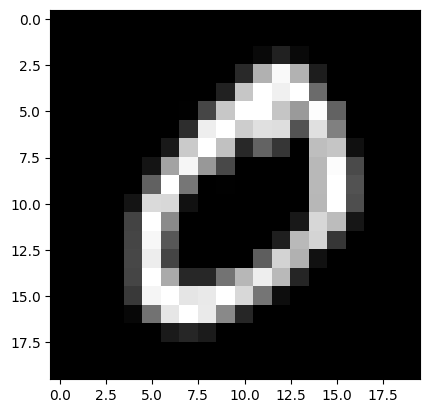

True

In [ ]:
import matplotlib.pyplot as plt

# 다음과 같이 하나씩 글자를 출력할 수 있다.
plt.imshow(cv2.cvtColor(x[0, 0], cv2.COLOR_GRAY2RGB))
plt.show()

# 다음과 같이 하나씩 글자를 출력할 수 있다.
cv2.imwrite('test_0.png', x[0, 0])
cv2.imwrite('test_1.png', x[5, 0])
cv2.imwrite('test_2.png', x[10, 0])
cv2.imwrite('test_3.png', x[15, 0])
cv2.imwrite('test_4.png', x[20, 0])
cv2.imwrite('test_5.png', x[25, 0])
cv2.imwrite('test_6.png', x[30, 0])
cv2.imwrite('test_7.png', x[35, 0])
cv2.imwrite('test_8.png', x[40, 0])
cv2.imwrite('test_9.png', x[45, 0])

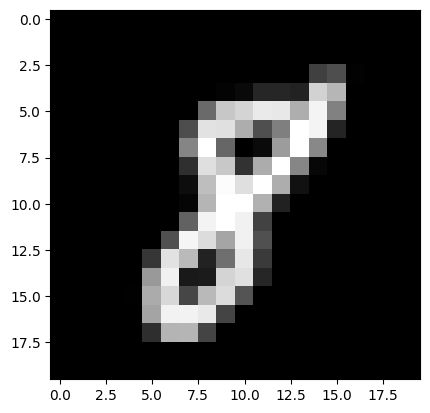

[[8.]]


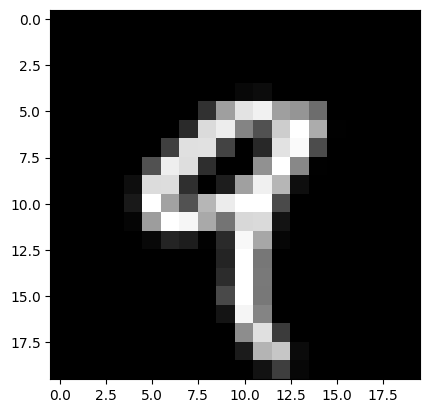

[[9.]]


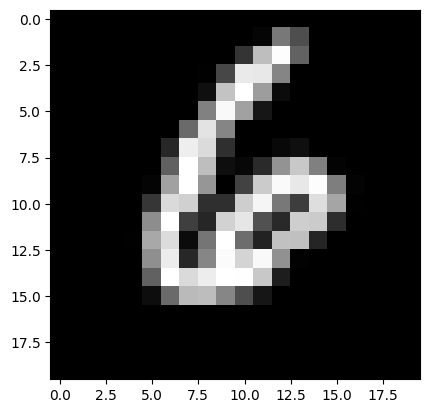

[[6.]]


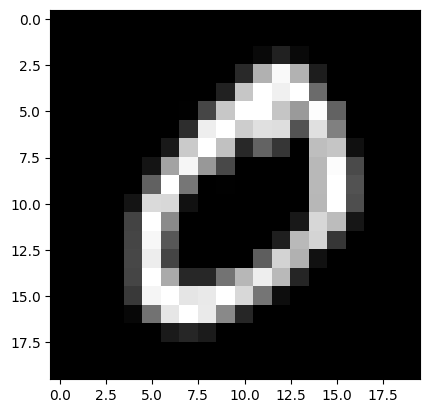

[[0.]]


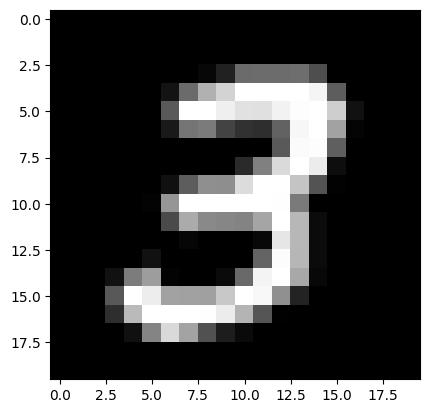

[[3.]]


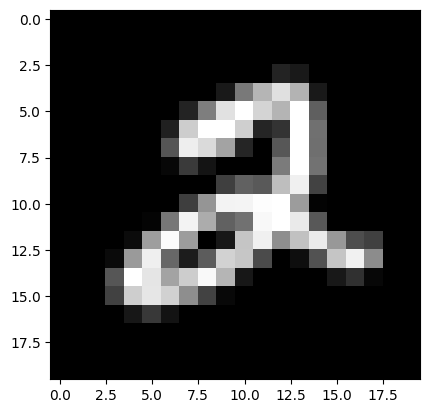

[[2.]]


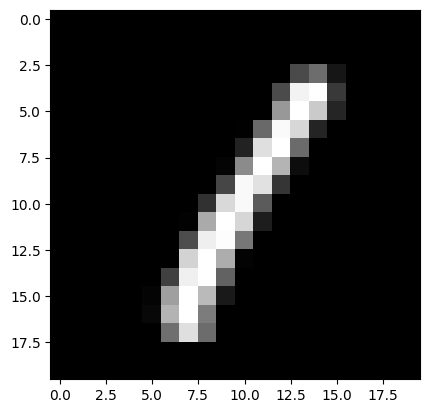

[[1.]]


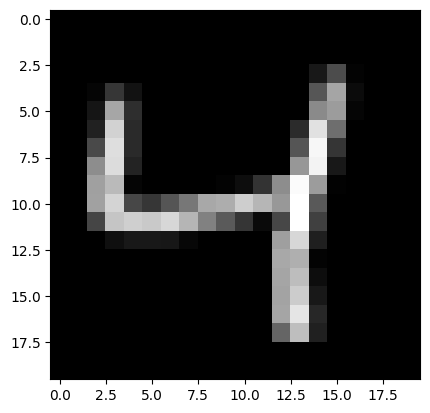

[[4.]]


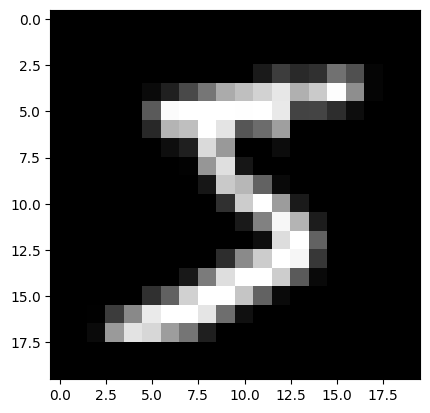

[[5.]]


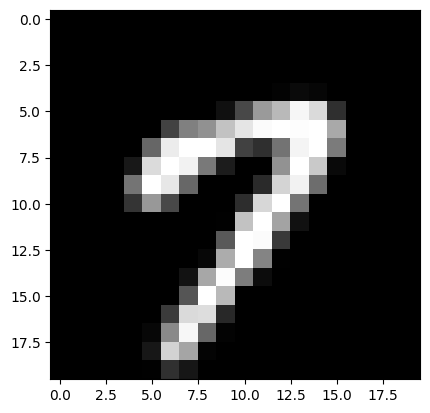

[[7.]]


In [ ]:
import cv2
import numpy as np
import glob

FILE_NAME = 'trained.npz'

# 파일로부터 학습 데이터를 불러온다.
def load_train_data(file_name):
  with np.load(file_name) as data:
    train = data['train']
    train_labels = data['train_labels']
  return train, train_labels

# 손 글씨 이미지를 (20X20)크기로 Scaling한다.
def resize20(image):
  image = cv2.imread(image)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray_resize = cv2.resize(gray, (20, 20))
  plt.imshow(cv2.cvtColor(gray_resize, cv2.COLOR_GRAY2RGB))
  plt.show()
  # 최종적으로는 (1X400)크기로 반환
  return gray_resize.reshape(-1, 400).astype(np.float32)

def check(test, train, train_labels):
  knn = cv2.ml.KNearest_create()
  knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
  # 가장 가까운 5개의 글자를 찾아, 어떤 숫자에 해당하는지 찾는다.
  ret, result, neighbours, dist = knn.findNearest(test, k=5)
  return result

train, train_labels = load_train_data(FILE_NAME)

for file_name in glob.glob('./test_*.png'):
  test = resize20(file_name)
  result = check(test, train, train_labels)
  print(result)